In [67]:
# Import necessary libraries
import re
import pandas as pd

# Read the data from the text file
f = open('WhatsApp Chat with Aakhri naach☠️.txt', 'r', encoding='utf-8')
data = f.read()
f.close()  # Always close the file after reading

# Display the raw data (optional)
print(data[:1000])  # Display first 1000 characters for inspection


05/10/2022, 14:00 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
05/10/2022, 14:00 - Kartikeya created group "Roomies"
05/10/2022, 14:00 - Kartikeya added you
05/10/2022, 14:00 - Kartikeya: hi
05/10/2022, 14:00 - Vaibhav Srivastava: <Media omitted>
05/10/2022, 14:00 - Vaibhav Srivastava: <Media omitted>
05/10/2022, 14:00 - Vaibhav Srivastava: <Media omitted>
05/10/2022, 14:00 - Archit Roommate: Interview for the Discipline (DC)  for Oneiros 2022 is  being held at old mess at 4:00pm today (5/10/22). 
Interested organising Committee (OC)  members are requested to attend the interview.
05/10/2022, 14:00 - Archit Roommate: Greetings everyone!

_"Passion is the genesis of genius"_💥

_Technology, like art, is the soaring exercise of human imagination!_👨‍💻

After a huge success from the past & wait of 3 years the biggest tech fest is back ✨

*IEEE MUJ* _brings to u an extravaganza of -  technology ,

In [68]:
# Define the pattern for extracting dates and messages
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

# Split the data into messages and extract the dates
messages = re.split(pattern, data)[1:]  # Split and ignore the first element (empty)
dates = re.findall(pattern, data)

# Display the first few messages and dates for verification
print(messages[:5])
print(dates[:5])


['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Kartikeya created group "Roomies"\n', 'Kartikeya added you\n', 'Kartikeya: hi\n', 'Vaibhav Srivastava: <Media omitted>\n']
['05/10/2022, 14:00 - ', '05/10/2022, 14:00 - ', '05/10/2022, 14:00 - ', '05/10/2022, 14:00 - ', '05/10/2022, 14:00 - ']


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vaibhav srivastava\AppData\Local\Temp\ipykernel_22832\3855809056.py:2: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [69]:
# Create a DataFrame with the messages and dates
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert 'message_date' to datetime format with error handling
try:
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M -')
except ValueError as e:
    print(f"Error in date conversion: {e}")
    # Inspect the problematic entries
    print(df['message_date'].head())

# Rename 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the DataFrame after renaming
df.head()


Error in date conversion: unconverted data remains when parsing with format "%d/%m/%Y, %H:%M -": " ", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
0    05/10/2022, 14:00 - 
1    05/10/2022, 14:00 - 
2    05/10/2022, 14:00 - 
3    05/10/2022, 14:00 - 
4    05/10/2022, 14:00 - 
Name: message_date, dtype: object


,user_message,date
0,Messages and calls are end-to-end encrypted. N...,"05/10/2022, 14:00 -"
1,"Kartikeya created group ""Roomies""\n","05/10/2022, 14:00 -"
2,Kartikeya added you\n,"05/10/2022, 14:00 -"
3,Kartikeya: hi\n,"05/10/2022, 14:00 -"
4,Vaibhav Srivastava: <Media omitted>\n,"05/10/2022, 14:00 -"


In [70]:
# Separate users and messages
users = []
messages = []

# Loop through the 'user_message' column and split into user and message
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)  # Use a raw string for regex
    if entry[1:]:  # If a username is detected
        users.append(entry[1])  # Append the username
        messages.append(entry[2])  # Append the message
    else:  # Handle cases where no username exists
        users.append('group_notification')
        messages.append(entry[0])  # The whole message is treated as a system notification

# Add new columns for users and messages
df['user'] = users
df['message'] = messages

# Drop the original 'user_message' column
df.drop(columns=['user_message'], inplace=True)

# Display the first few rows of the DataFrame
df.head()


,date,user,message
0,"05/10/2022, 14:00 -",group_notification,Messages and calls are end-to-end encrypted. N...
1,"05/10/2022, 14:00 -",group_notification,"Kartikeya created group ""Roomies""\n"
2,"05/10/2022, 14:00 -",group_notification,Kartikeya added you\n
3,"05/10/2022, 14:00 -",Kartikeya,hi\n
4,"05/10/2022, 14:00 -",Vaibhav Srivastava,<Media omitted>\n


In [71]:
# Ensure 'date' column is in datetime format
df[df['date'].isna()]  # Check rows where 'date' is NaT




,date,user,message


In [72]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check the type of the 'date' column to confirm it's in datetime format
print(df['date'].dtype)

# Now extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Display the year column to verify
df['year'].head()

C:\Users\vaibhav srivastava\AppData\Local\Temp\ipykernel_22832\3359623812.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


datetime64[ns]


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: year, dtype: float64

In [73]:
df['date'].dt.year

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2919   NaN
2920   NaN
2921   NaN
2922   NaN
2923   NaN
Name: date, Length: 2924, dtype: float64

In [74]:
df.head()

,date,user,message,year
0,NaT,group_notification,Messages and calls are end-to-end encrypted. N...,NaN
1,NaT,group_notification,"Kartikeya created group ""Roomies""\n",NaN
2,NaT,group_notification,Kartikeya added you\n,NaN
3,NaT,Kartikeya,hi\n,NaN
4,NaT,Vaibhav Srivastava,<Media omitted>\n,NaN


In [75]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date']=pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00
2,Kartikeya added you\n,2022-10-05 14:00:00
3,hi\n,2022-10-05 14:00:00
4,<Media omitted>\n,2022-10-05 14:00:00


In [76]:
def safe_convert_date(date_str):
    try:
        # Attempt conversion to datetime
        return pd.to_datetime(date_str, format='%d/%m/%Y, %H:%M -', errors='raise')
    except Exception:
        # If conversion fails, return the original string
        return date_str

# Apply the safe_convert_date function to 'message_date' column
df['date'] = df['message_date'].apply(safe_convert_date)

# Display the dataframe to inspect date conversion
print("Data with 'date' column:")
print(df.head())

Data with 'date' column:
                                        user_message        message_date  \
0  Messages and calls are end-to-end encrypted. N... 2022-10-05 14:00:00   
1                Kartikeya created group "Roomies"\n 2022-10-05 14:00:00   
2                              Kartikeya added you\n 2022-10-05 14:00:00   
3                                               hi\n 2022-10-05 14:00:00   
4                                  <Media omitted>\n 2022-10-05 14:00:00   

                 date  
0 2022-10-05 14:00:00  
1 2022-10-05 14:00:00  
2 2022-10-05 14:00:00  
3 2022-10-05 14:00:00  
4 2022-10-05 14:00:00  


In [77]:
df['year']=df['date'].dt.year

In [78]:
df.head()

,user_message,message_date,date,year
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022


In [79]:
df['month']=df['date'].dt.month_name()

In [80]:
df.head()

,user_message,message_date,date,year,month
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October


In [81]:
df['month']=df['date'].dt.month_name()

In [82]:
df['day']=df['date'].dt.day

In [83]:
df['hour']=df['date'].dt.hour

In [84]:
df['minute']=df['date'].dt.minute

In [85]:
df.head()

,user_message,message_date,date,year,month,day,hour,minute
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0


In [87]:
df[df['user'] == 'Kartikeya']

KeyError: 'user'

In [88]:
df['user'] = users

In [89]:
df.head()

,user_message,message_date,date,year,month,day,hour,minute,user
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Kartikeya
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Vaibhav Srivastava


In [90]:
df[df['user'] == 'Kartikeya']


,user_message,message_date,date,year,month,day,hour,minute,user
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Kartikeya
16,<Media omitted>\n,2022-10-06 09:47:00,2022-10-06 09:47:00,2022,October,6,9,47,Kartikeya
23,jaldi pauhach ke seat rok lena\n,2022-10-07 14:55:00,2022-10-07 14:55:00,2022,October,7,14,55,Kartikeya
58,,2022-10-10 17:56:00,2022-10-10 17:56:00,2022,October,10,17,56,Kartikeya
59,,2022-10-12 00:27:00,2022-10-12 00:27:00,2022,October,12,0,27,Kartikeya
...,...,...,...,...,...,...,...,...,...
2914,tum batao kitni hai\n,2025-01-10 19:38:00,2025-01-10 19:38:00,2025,January,10,19,38,Kartikeya
2917,8.7 hai\n,2025-01-10 19:41:00,2025-01-10 19:41:00,2025,January,10,19,41,Kartikeya
2920,abhi abhi\n,2025-01-10 19:42:00,2025-01-10 19:42:00,2025,January,10,19,42,Kartikeya
2921,hn saale\n,2025-01-10 19:43:00,2025-01-10 19:43:00,2025,January,10,19,43,Kartikeya


In [92]:
df[df['user'] == 'Vaibhav Srivastava'].shape

(1064, 9)

In [98]:
words = []
for message in df['user_message']:
    words.extend(message.split())

In [100]:
len(words)

10735

In [103]:
from urlextract import URLExtract
extractor = URLExtract()
urls= extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an exapmle google.com, http://facebook.com, ftp://url.in")
urls                          

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [110]:
links=[]
for message in df['user_message']:
    links.extend(extractor.find_urls(message))

In [112]:
len(links)

47

In [108]:
df

,user_message,message_date,date,year,month,day,hour,minute,user
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Kartikeya
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Vaibhav Srivastava
...,...,...,...,...,...,...,...,...,...
2919,Kab open ki thi site\n,2025-01-10 19:42:00,2025-01-10 19:42:00,2025,January,10,19,42,Vaibhav Srivastava
2920,abhi abhi\n,2025-01-10 19:42:00,2025-01-10 19:42:00,2025,January,10,19,42,Kartikeya
2921,hn saale\n,2025-01-10 19:43:00,2025-01-10 19:43:00,2025,January,10,19,43,Kartikeya
2922,Yr phone mai toh open hi nahi ho rahe\n,2025-01-10 19:43:00,2025-01-10 19:43:00,2025,January,10,19,43,Vaibhav Srivastava


In [116]:
x=df['user'].value_counts()

In [114]:
import matplotlib.pyplot as plt


In [117]:
name = x.index
count = x.values

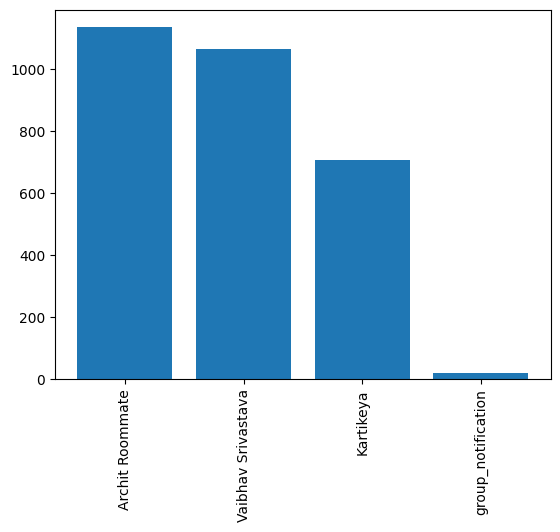

In [121]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [127]:
round((df['user'].value_counts()/df.shape[0])*100).reset_index().rename(columns={'index':'name','count':'percent'})

,user,percent
0,Archit Roommate,39.0
1,Vaibhav Srivastava,36.0
2,Kartikeya,24.0
3,group_notification,1.0


In [128]:
df

,user_message,message_date,date,year,month,day,hour,minute,user
0,Messages and calls are end-to-end encrypted. N...,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
1,"Kartikeya created group ""Roomies""\n",2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
2,Kartikeya added you\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,group_notification
3,hi\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Kartikeya
4,<Media omitted>\n,2022-10-05 14:00:00,2022-10-05 14:00:00,2022,October,5,14,0,Vaibhav Srivastava
...,...,...,...,...,...,...,...,...,...
2919,Kab open ki thi site\n,2025-01-10 19:42:00,2025-01-10 19:42:00,2025,January,10,19,42,Vaibhav Srivastava
2920,abhi abhi\n,2025-01-10 19:42:00,2025-01-10 19:42:00,2025,January,10,19,42,Kartikeya
2921,hn saale\n,2025-01-10 19:43:00,2025-01-10 19:43:00,2025,January,10,19,43,Kartikeya
2922,Yr phone mai toh open hi nahi ho rahe\n,2025-01-10 19:43:00,2025-01-10 19:43:00,2025,January,10,19,43,Vaibhav Srivastava


In [143]:
temp = df[df['user']!='group_notification']
temp=temp[temp['user_message']!='<Media omitted>\n']

In [145]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [158]:
words = []

for message in temp['user_message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [159]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,dinner,59
1,aao,45
2,baje,44
3,chalo,44
4,lunch,41
5,mike,38
6,kab?,30
7,dinner?,29
8,gym,27
9,lunch?,23
